In [ ]:
!pip install layoutparser "layoutparser[layoutmodels]"

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import layoutparser as lp
import numpy as np
import cv2

In [ ]:
# Load the model
model = lp.AutoLayoutModel("lp://efficientdet/PubLayNet/tf_efficientdet_d1")

Detected Sections:
- Text (Confidence: 0.98)
- Text (Confidence: 0.98)
- Text (Confidence: 0.98)
- List (Confidence: 0.93)
- Table (Confidence: 0.83)
- Text (Confidence: 0.79)
- Title (Confidence: 0.62)
- Text (Confidence: 0.50)
- Text (Confidence: 0.49)
- Title (Confidence: 0.48)
- Text (Confidence: 0.26)


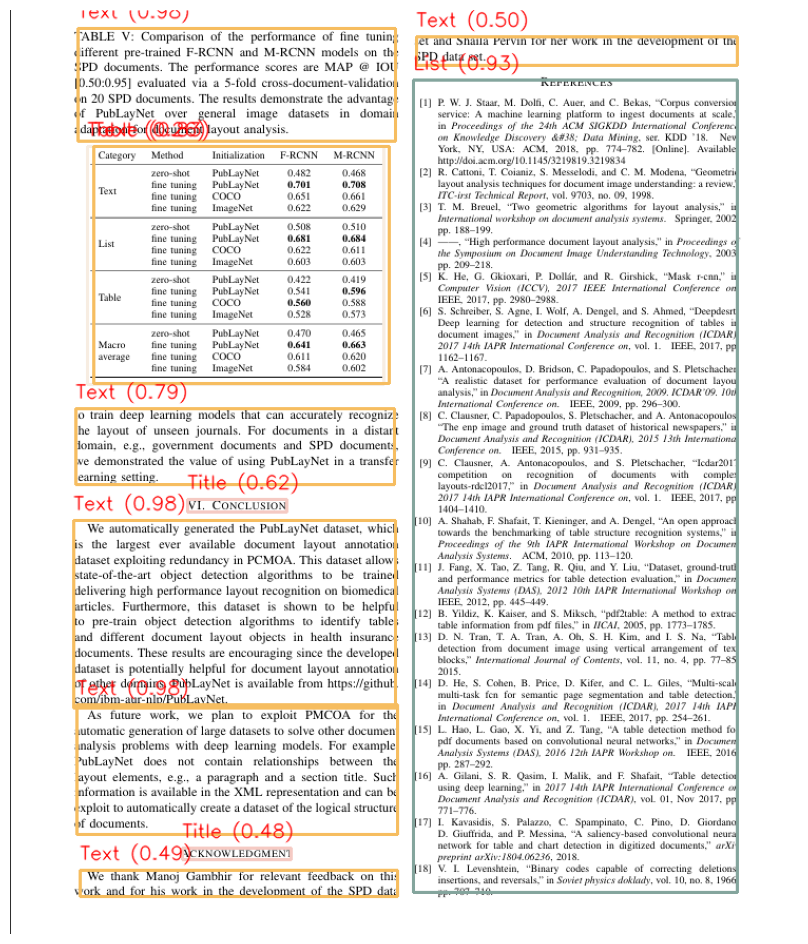

In [ ]:
# Load the image
img_path = "/content/paper.jpg"
image = Image.open(img_path).convert("RGB")  # Ensure RGB format

# Convert image to NumPy array
image_np = np.array(image)

# Detect layout
layout = model.detect(image)

# Print detected section names
print("Detected Sections:")
for block in layout:
    print(f"- {block.type} (Confidence: {block.score:.2f})")

# Draw bounding boxes
image_with_boxes = lp.draw_box(image_np, layout, box_width=3)

# Convert PIL image to NumPy array for OpenCV compatibility
image_with_labels = np.array(image_with_boxes)

# Define font settings for text labels
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.6
font_color = (255, 0, 0)
thickness = 1

# Add labels to detected boxes
for block in layout:
    points = np.array(block.block.points)
    x1, y1 = np.min(points, axis=0).astype(int)
    x2, y2 = np.max(points, axis=0).astype(int)
    label = f"{block.type} ({block.score:.2f})"

    # Use OpenCV to draw text on the image
    cv2.putText(image_with_labels, label, (x1, max(y1 - 10, 0)), font, font_scale, font_color, thickness, cv2.LINE_AA)

# Display the final image
plt.figure(figsize=(12, 12))
plt.imshow(image_with_labels)
plt.axis("off")
plt.show()

Detected Sections:
- Text (Confidence: 1.00)
- Text (Confidence: 0.99)
- Text (Confidence: 0.89)
- Figure (Confidence: 0.87)
- Text (Confidence: 0.86)
- Table (Confidence: 0.85)
- Text (Confidence: 0.80)
- Title (Confidence: 0.63)
- List (Confidence: 0.47)
- Text (Confidence: 0.47)
- Text (Confidence: 0.36)
- Text (Confidence: 0.27)


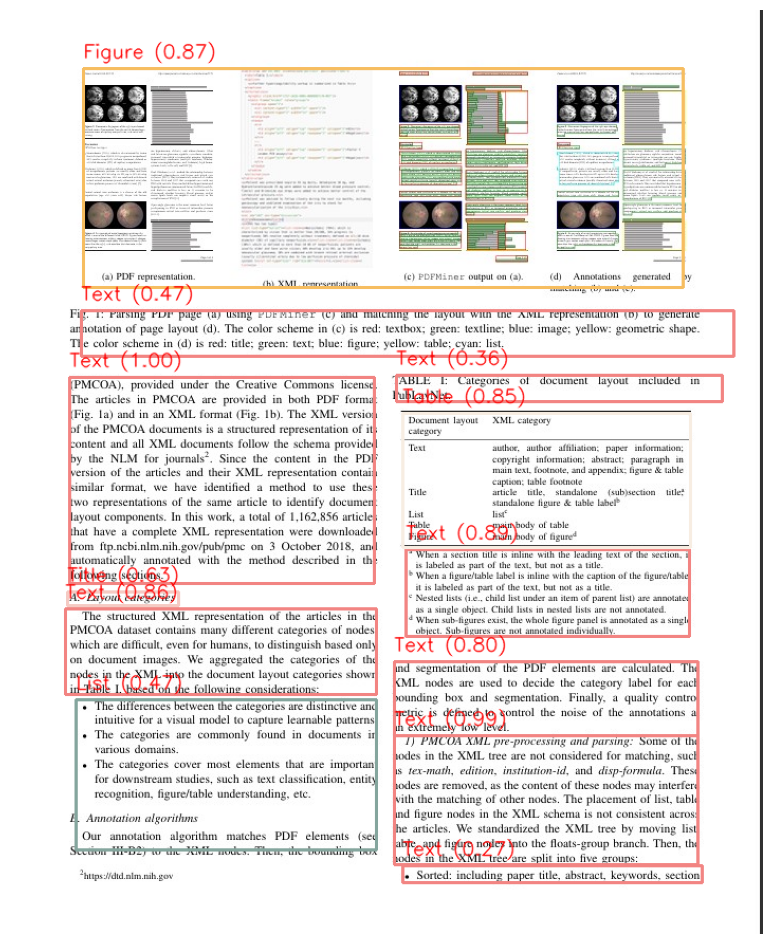

In [ ]:
# Load the image
img_path = "/content/paper2.jpg"
image = Image.open(img_path).convert("RGB")  # Ensure RGB format

# Convert image to NumPy array
image_np = np.array(image)  # **Original clean image for OCR**
image_copy = image_np.copy()  # **Copy for drawing bounding boxes**

# Detect layout
layout = model.detect(image)

# Print detected section names
print("Detected Sections:")
for block in layout:
    print(f"- {block.type} (Confidence: {block.score:.2f})")

# OCR Image (Clean Copy)
image_for_ocr = image_np.copy()  # This will remain unaltered for OCR processing

# Visualization (With Labels & Bounding Boxes)
image_with_boxes = lp.draw_box(image_copy, layout, box_width=3)  # Draw bounding boxes
image_with_labels = np.array(image_with_boxes)  # Convert to NumPy for OpenCV processing

# Define font settings for text labels
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.6
font_color = (255, 0, 0)  # Red text
thickness = 1

# Add labels to detected boxes
for block in layout:
    points = np.array(block.block.points)
    x1, y1 = np.min(points, axis=0).astype(int)
    x2, y2 = np.max(points, axis=0).astype(int)
    label = f"{block.type} ({block.score:.2f})"

    # Draw label text
    cv2.putText(image_with_labels, label, (x1, max(y1 - 10, 0)), font, font_scale, font_color, thickness, cv2.LINE_AA)

# Save the clean image for OCR (optional)
clean_ocr_image = Image.fromarray(image_for_ocr)
clean_ocr_image.save("/content/clean_for_ocr.jpg")

# Display the annotated image
plt.figure(figsize=(12, 12))
plt.imshow(image_with_labels)
plt.axis("off")
plt.show()